In [1]:
import io
from itertools import count
import pymysql
import getpass
import pandas as pd

import networkx as nx
from networkx import Graph as NXGraph
from networkx.drawing.nx_agraph import graphviz_layout

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import collections

from IPython.display import display, Image

In [2]:
p = getpass.getpass()

········


Acho que vale a pena deixar o modelo do banco para termos as conexões em mente

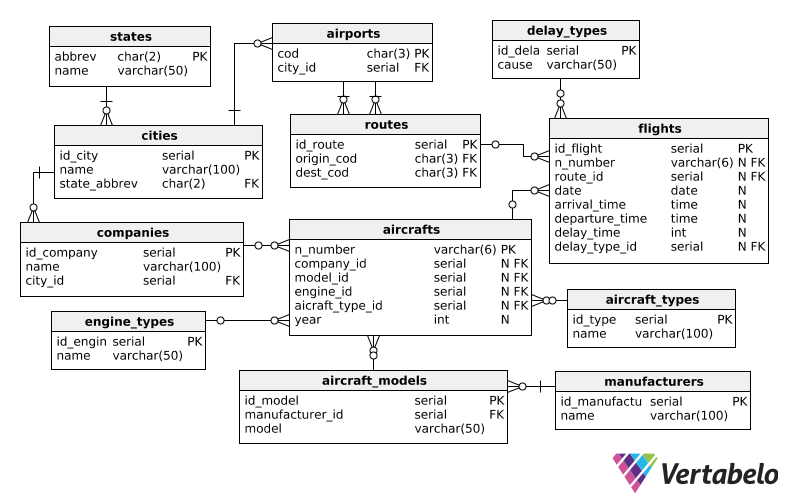

Quantidade de aeronaves por Companhia

In [3]:
conn = pymysql.connect(host = 'localhost',
                       user = 'root', 
                       passwd = p, 
                       database = 'usa_flights')

cur = conn.cursor()

In [4]:
query = '''
SELECT companies.name AS Company,
       Count(Companys_id) AS Aircrafts
FROM aircrafts
INNER JOIN companies ON companies.id_company = aircrafts.Companys_id
GROUP BY Companys_id
ORDER BY Aircrafts DESC;
'''

pd.read_sql_query(query, conn)

,Company,Aircrafts
0,DELTA AIR LINES INC,882
1,UNITED AIRLINES INC,856
2,AMERICAN AIRLINES INC,834
3,WELLS FARGO BANK NA TRUSTEE,802
4,SOUTHWEST AIRLINES INC,607
5,SKY WEST AIRLINES INC,442
6,WILMINGTON TRUST CO TRUSTEE,230
7,BANK OF UTAH TRUSTEE,206
8,JETBLUE AIRWAYS CORPORATION,199
9,ALASKA AIRLINES INC,164


Quantidade de voos por Companhia e Aeronave em cada Rota

In [5]:
query = '''
SELECT companies.name AS Companny,
       aircrafts.N_Number AS Aircraft, 
       routes.Departure_Airport_id AS Departure, 
       routes.Arrival_Airport_id AS Arrival,
       COUNT(aircrafts.N_Number) AS Flights
FROM flights
INNER JOIN aircrafts ON aircrafts.n_number = flights.Aircrafts_id
INNER JOIN routes ON flights.Route_id = routes.id_route
INNER JOIN companies ON companies.id_company = aircrafts.Companys_id
GROUP BY companies.name, aircrafts.N_Number, routes.Departure_Airport_id, routes.Arrival_Airport_id
ORDER BY Flights DESC
;
'''

pd.read_sql_query(query, conn)

,Companny,Aircraft,Departure,Arrival,Flights
0,HAWAIIAN AIRLINES INC,N483HA,HNL,OGG,38
1,HAWAIIAN AIRLINES INC,N488HA,HNL,OGG,34
2,HAWAIIAN AIRLINES INC,N489HA,HNL,OGG,34
3,AMERICAN AIRLINES INC,N945UW,LGA,BOS,33
4,AMERICAN AIRLINES INC,N945UW,BOS,LGA,32
5,HAWAIIAN AIRLINES INC,N481HA,KOA,HNL,32
6,HAWAIIAN AIRLINES INC,N483HA,OGG,HNL,31
7,HAWAIIAN AIRLINES INC,N488HA,KOA,HNL,30
8,HAWAIIAN AIRLINES INC,N485HA,HNL,OGG,29
9,HAWAIIAN AIRLINES INC,N489HA,OGG,HNL,29


Quantidade de voos que partiram de cada aeroporto por Companhia

In [6]:
query = '''
SELECT companies.name AS Companny,
       routes.Departure_Airport_id AS Departure, 
       COUNT(routes.Departure_Airport_id) AS Flights
FROM flights
INNER JOIN aircrafts ON aircrafts.n_number = flights.Aircrafts_id
INNER JOIN routes ON flights.Route_id = routes.id_route
INNER JOIN companies ON companies.id_company = aircrafts.Companys_id
GROUP BY companies.name, routes.Departure_Airport_id
ORDER BY Flights DESC
;
'''

pd.read_sql_query(query, conn)

,Companny,Departure,Flights
0,DELTA AIR LINES INC,ATL,7058
1,AMERICAN AIRLINES INC,CLT,7018
2,AMERICAN AIRLINES INC,DFW,5164
3,UNITED AIRLINES INC,IAH,5081
4,AMERICAN AIRLINES INC,ORD,4119
5,SOUTHWEST AIRLINES INC,LAS,3058
6,UNITED AIRLINES INC,EWR,2989
7,UNITED AIRLINES INC,ORD,2972
8,SOUTHWEST AIRLINES INC,PHX,2920
9,UNITED AIRLINES INC,DEN,2692


Quantida de voos que chegaram em cada aeroporto por Companhia

In [7]:
query = '''
SELECT companies.name AS Companny,
       routes.Arrival_Airport_id AS Arrival, 
       COUNT(routes.Arrival_Airport_id) AS Flights
FROM flights
INNER JOIN aircrafts ON aircrafts.n_number = flights.Aircrafts_id
INNER JOIN routes ON flights.Route_id = routes.id_route
INNER JOIN companies ON companies.id_company = aircrafts.Companys_id
GROUP BY companies.name, routes.Arrival_Airport_id
ORDER BY Flights DESC
;
'''

pd.read_sql_query(query, conn)

,Companny,Arrival,Flights
0,DELTA AIR LINES INC,ATL,7046
1,AMERICAN AIRLINES INC,CLT,6656
2,AMERICAN AIRLINES INC,DFW,5124
3,UNITED AIRLINES INC,IAH,5073
4,AMERICAN AIRLINES INC,ORD,4213
5,SOUTHWEST AIRLINES INC,LAS,3040
6,UNITED AIRLINES INC,ORD,2994
7,UNITED AIRLINES INC,EWR,2927
8,SOUTHWEST AIRLINES INC,MDW,2888
9,SOUTHWEST AIRLINES INC,DAL,2853


In [8]:
query = '''
SELECT companies.name AS Companny,
       CONCAT(routes.Departure_Airport_id,'-', routes.Arrival_Airport_id) AS Route,
       COUNT(aircrafts.N_Number) AS Flights
FROM flights
INNER JOIN aircrafts ON aircrafts.n_number = flights.Aircrafts_id
INNER JOIN routes ON flights.Route_id = routes.id_route
INNER JOIN companies ON companies.id_company = aircrafts.Companys_id
GROUP BY companies.name, routes.Departure_Airport_id, routes.Arrival_Airport_id
ORDER BY Flights DESC
;
'''

df = pd.read_sql_query(query, conn)
df

,Companny,Route,Flights
0,HAWAIIAN AIRLINES INC,HNL-OGG,321
1,HAWAIIAN AIRLINES INC,OGG-HNL,298
2,SOUTHWEST AIRLINES INC,HOU-DAL,285
3,SOUTHWEST AIRLINES INC,DAL-HOU,253
4,HAWAIIAN AIRLINES INC,KOA-HNL,235
5,AMERICAN AIRLINES INC,CLT-DFW,231
6,SOUTHWEST AIRLINES INC,SAN-SJC,225
7,SOUTHWEST AIRLINES INC,SJC-SAN,217
8,DELTA AIR LINES INC,MCO-ATL,216
9,AMERICAN AIRLINES INC,DFW-CLT,213


In [9]:
G = nx.DiGraph()

j = 0

for ind in df.index:
    G.add_node(df.loc[ind, 'Companny'], color = 'blue')
    G.add_node(df.loc[ind, 'Route'], color = 'green')
    G.add_edge(df.loc[ind, 'Companny'], df.loc[ind, 'Route'],
                   color='violet',
                   relation='has route')

C:\Users\igorm\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\igorm\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


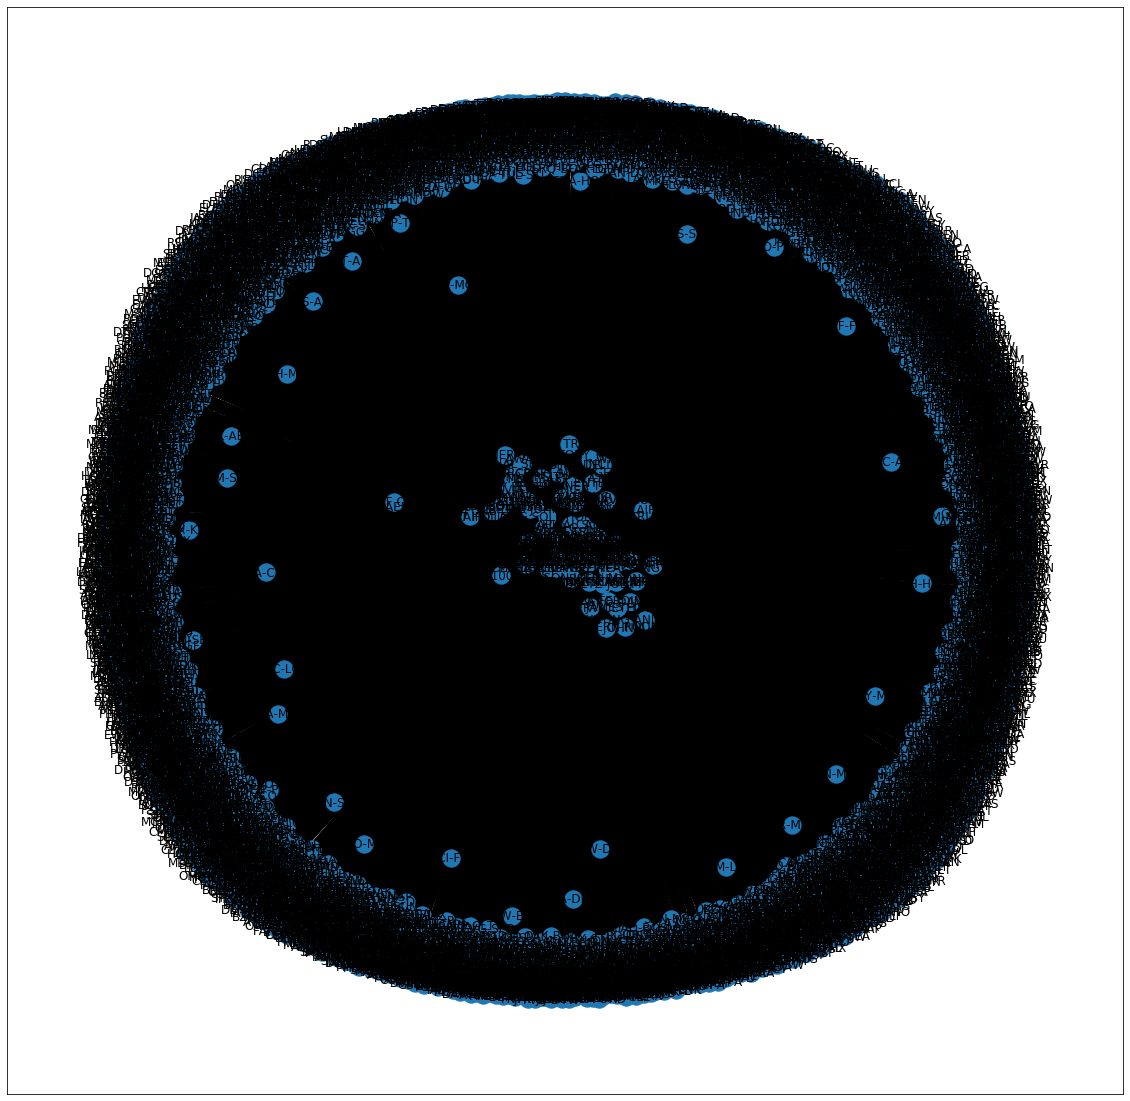

In [10]:
fig, ax = plt.subplots(figsize=(20,20))
pos = nx.spring_layout(G, scale=1)

nx.draw_networkx(G, pos = pos, ax = ax)

C:\Users\igorm\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


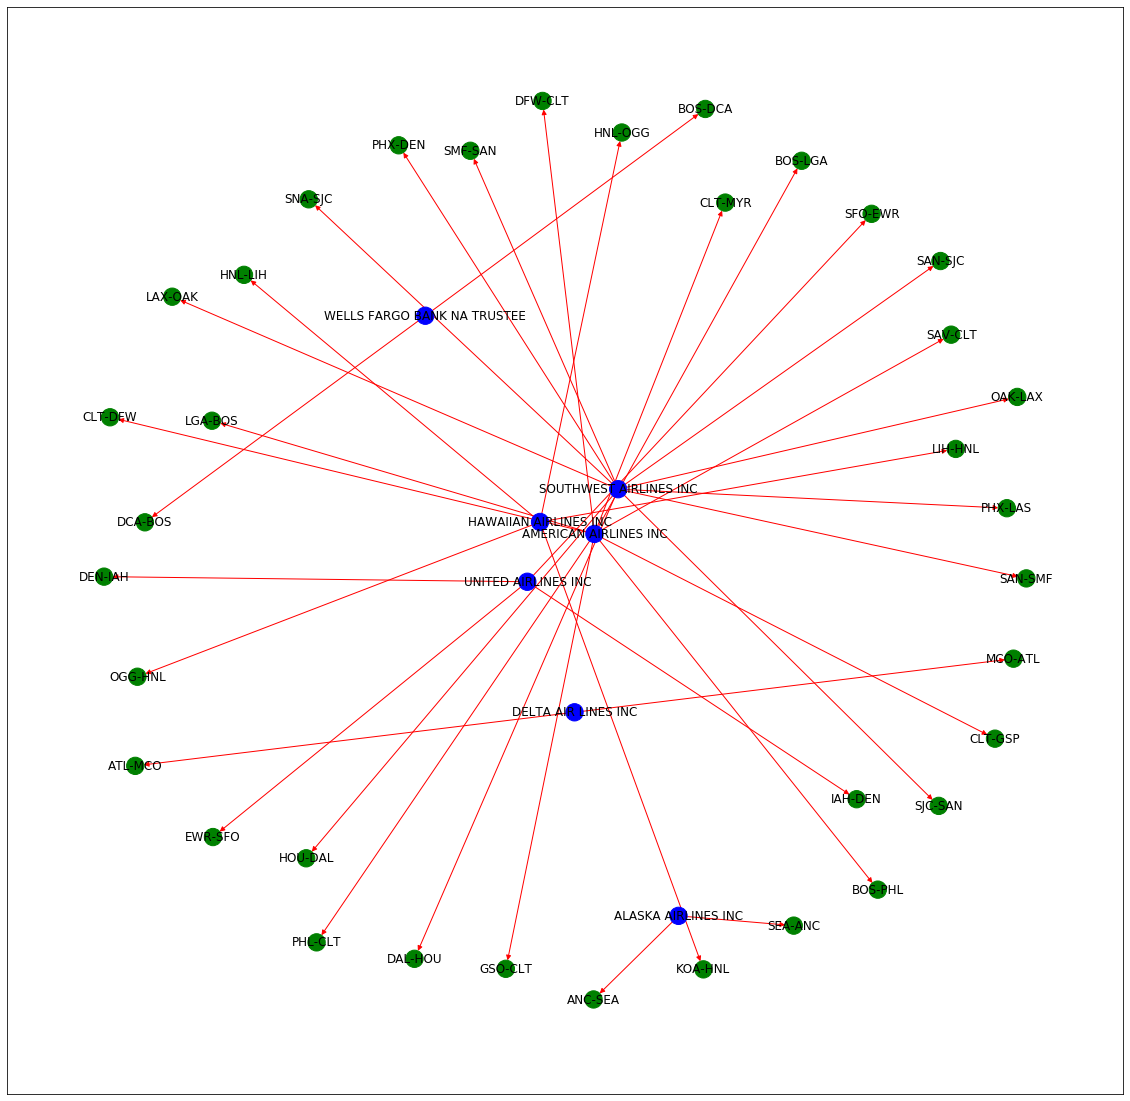

In [11]:
G = nx.DiGraph()

j = 0

for ind in df.index:
    if df.loc[ind, 'Flights'] >= 180:
        G.add_node(df.loc[ind, 'Companny'], color = 'blue')
        G.add_node(df.loc[ind, 'Route'], color = 'green')
        G.add_edge(df.loc[ind, 'Companny'], df.loc[ind, 'Route'],
                       color='red')
        

fig, ax = plt.subplots(figsize=(20,20))
pos = nx.spring_layout(G, scale=1)

nx.draw_networkx(G,
                 pos = pos,
                 ax = ax,
                 node_color = [nx.get_node_attributes(G,'color')[g] for g in G.nodes()],
                 edge_color = [nx.get_edge_attributes(G,'color')[g] for g in G.edges()],)